## Trabalho Prático - Módulo 4 - Machine Learning
##### **Com respotas do questionário**

## Objetivo:
* Análise exploratória dos dados (EDA - Exploratory Data Analysis).
* Preparação dos dados.
* Comparação e ajuste de modelos de classificação.


Dataset: https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br 


**The Fashion MNIST Database**<br>
Descrição

Este tutorial treina um modelo de rede neural para classificação de imagens de roupas, como tênis e camisetas. Tudo bem se você não entender todos os detalhes; este é um visão geral de um programa do TensorFlow com detalhes explicados enquanto progredimos.


## Tutorial - Treine sua primeira rede neural: classificação básica

In [ ]:
# importando as bibliotecas

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.3.0


In [ ]:
# Fashion MNIST Dataset
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
# Carregando a base de dados que retorna quatro NumPy arrays
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Explore os dados

In [ ]:
print(f'train images: {len(train_images)} \ntest images:  {len(test_images)}')

train images: 60000 
test images:  10000


In [ ]:
# conjunto de treinamento, e cada imagem é representada em 28 x 28 pixels
train_images.shape

(60000, 28, 28)

In [ ]:
# Cada label é um inteiro entre 0 e 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
# Todas as labels
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Pré-processe os dados

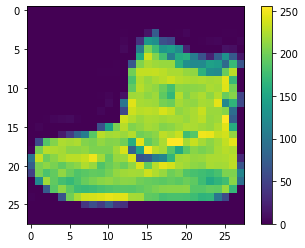

In [ ]:
# Primeira imagem do conjunto de dados
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Escalaremos esses valores no intervalo de 0 e 1 antes antes de alimentar o modelo da rede neural.
train_images = train_images / 255.0

test_images = test_images / 255.0

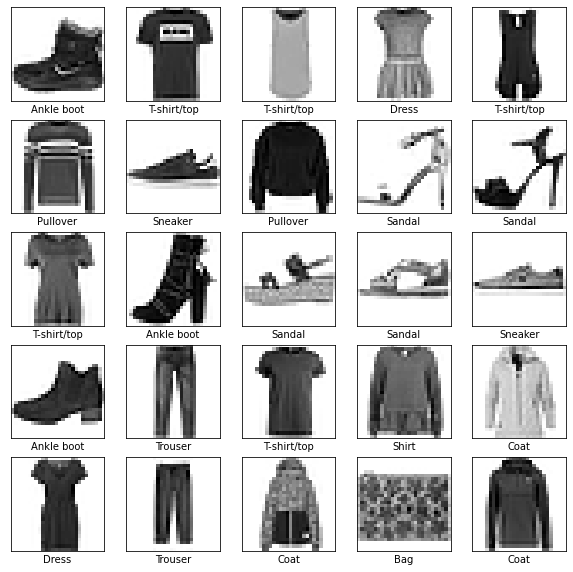

In [ ]:
# Primeiras 25 imagens do conjunto de treinamento
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### Construindo o modelo

In [ ]:
# Montar as camadas
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


####Treine o modelo

In [ ]:
# Treine o modelo com o método fit
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5037 - accuracy: 0.8228
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3716 - accuracy: 0.8663
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3347 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3095 - accuracy: 0.8872
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2927 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2781 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2631 - accuracy: 0.9025
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2557 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2452 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.235

#### Avalie a acurácia

In [ ]:
# compare como o modelo performou com o conjunto de teste
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3598 - accuracy: 0.8773

Test accuracy: 0.8773000240325928


#### Faça predições

In [ ]:
# Para predições de algumas imagens
predictions = model.predict(test_images)

In [ ]:
# Primeira pedição do conjunto. A predição é um array de 10 números
predictions[0]

array([8.1266717e-06, 9.8639714e-11, 1.6522526e-08, 4.2831082e-12,
       5.5435734e-10, 3.1135017e-03, 1.1151504e-08, 1.2586518e-02,
       2.2906760e-07, 9.8429155e-01], dtype=float32)

In [ ]:
# Podemos ver cada label tem um maior valor de confiança.
# Então, o modelo é confiante de que essa imagem é uma bota (ankle boot) ou class_names[9]
np.argmax(predictions[0])

9

In [ ]:
# Examinando a label do teste, vemos que essa classificação é correta
test_labels[0]

9

In [ ]:
# Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10 classes.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

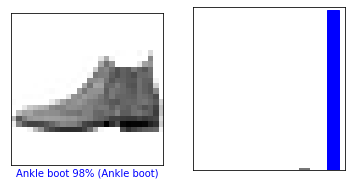

In [ ]:
# Vamos olhar a previsão imagem na posição 0, do array de predição.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

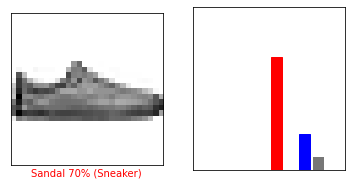

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

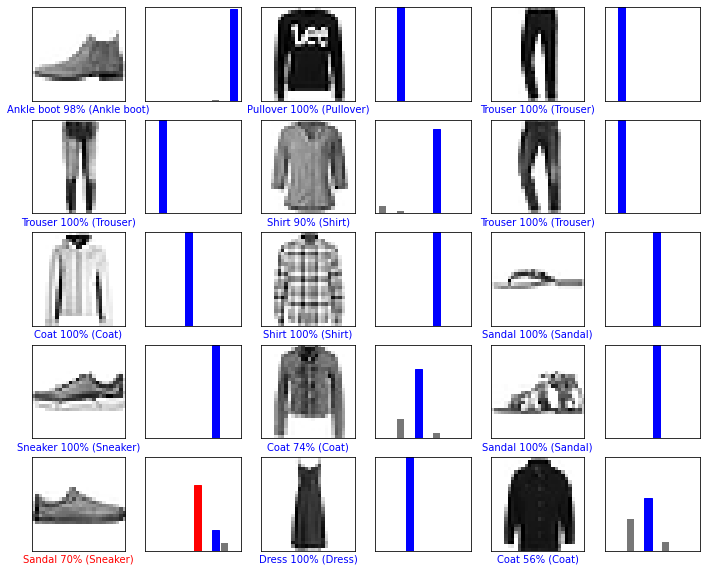

In [ ]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


In [ ]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[8.1266799e-06 9.8639909e-11 1.6522590e-08 4.2831242e-12 5.5435628e-10
  3.1134987e-03 1.1151525e-08 1.2586525e-02 2.2906825e-07 9.8429155e-01]]


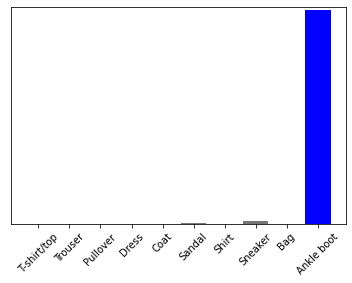

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

9

## Questionário

#### Pergunta 1
Que tipo de Aprendizado foi utilizado no nosso problema?

- Não supervisionado.

- Aprendizado por reforço.

- Semi-supervisionado.

- ***Supervisionado.***


#### Pergunta 2
O modelo lida com quantas classes?

- 9.

- 8.

- 7.

- ***10.***


#### Pergunta 3
Como os tipos de características foram identificadas?

- ***Pelos descritores de forma.***

- Pelos tradutores manuais de imagem.

- Pelas regressões logísticas de forma.

- Pelos inversores de borda.


#### Pergunta 4
Podemos citar a análise utilizada aqui como:

- Alternativa.

- Retroativa.

- ***Preditiva.***

- Especialista.


#### Pergunta 5
Pensando no conceito de Inteligência Artificial, podemos dizer que:

- O sistema montado repete instruções prévias.

- O sistema montado tenta deduzir como máquinas.

- O sistema montado não é capaz de generalizar.

- ***O sistema montado tenta pensar como humanos.***


#### Pergunta 6
O desempenho do sistema deve melhorar não apenas na repetição da mesma tarefa, mas também nas tarefas similares do domínio. Portanto:

- O aprendizado envolve a regressão a partir da observação.

- O aprendizado envolve a regressão a partir da experiência.

- O aprendizado envolve a repetição linear a partir da experiência.

- ***O aprendizado envolve a generalização a partir da experiência.***


#### Pergunta 7
O exemplo foi que tipo de inferência?

- Dedutiva.

- Classificativa.

- Repetitiva.

- ***Indutiva.***


#### Pergunta 8
Nesse trabalho qual tipo de algoritmo foi usado para classificar?

- SVM.

- Redes recorrentes.

- Regressão Logística.

- ***Redes Neurais.***


#### Pergunta 9
Pelo uso do Flatten, podemos afirmar qual foi a rede utilizada?

- Sim, foi um Flatten por Reforço.

- Sim, foi um Perceptron Multicamada.

- Não, pois o Flatten é algo inexistente.

- ***Sim, foi uma Rede Neural CNN.***


#### Pergunta 10
Para que serviu a função Loss no nosso modelo?

- Internaliza a função para guiar o modelo para direção certa.

- Otimiza a função para guiar o modelo para direção aleatória.

- Maximiza a função para guiar o modelo para direção certa.

- ***Minimiza a função para guiar o modelo para direção certa.***


#### Pergunta 11
Para que serve o comando model.fit?

- ***Treinamento.***

- Verificar a acurácia.

- Teste.

- Iniciar o modelo para carga.


#### Pergunta 12
No treinamento do modelo, qual foi a acurácia da Epoch 5/10?

- 0,8252.

- 0,08852.

- ***0,8914.***

- 0,8114.


#### Pergunta 13
Qual foi a acurácia do modelo no teste?

- 0,9811.

- ***0,8811.***

- 0,313.

- 0,3418.


#### Pergunta 14
Quantas imagens foram utilizadas para a etapa de predição?

- 5.

- 4.

- 2.

- ***1.***


#### Pergunta 15
Acerca do exemplo apresentado responda qual foi o resultado da classificação e se ela retornou o valor correto?

- Label 8 de forma correta.

- ***Label 9 de forma correta.***

- Label 8 de forma incorreta.

- Label 7 de forma correta.
